In [27]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [28]:
#Path to Files
from google.colab import drive
import os
drive.mount('/content/gdrive')

#authentication key will ask you to log in, this ensures the user has to sign in, 
# folder access only allowed to ucsd users. 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
# check path
!ls gdrive/Shareddrives/Cogs118BFinalProject/

sketches_fc6_nopca.npy	sketches_metadata.csv	  sketches_raw_nopca.npy
sketches_fc6_pca.npy	sketches_metadata.gsheet  sketches_raw_pca.npy


In [30]:
path_to_directory = 'gdrive/Shareddrives/Cogs118BFinalProject/'
files = os.listdir(path_to_directory)
files

['sketches_raw_pca.npy',
 'sketches_raw_nopca.npy',
 'sketches_metadata.csv',
 'sketches_fc6_pca.npy',
 'sketches_fc6_nopca.npy',
 'sketches_metadata.gsheet']

In [31]:
path = os.path.join(path_to_directory, files[1])
raw_nopca = np.load(path)
print("type: ", type(raw_nopca))
print("shape: ", np.shape(raw_nopca))

type:  <class 'numpy.ndarray'>
shape:  (12288, 50176)


(50176,)
(224, 224)


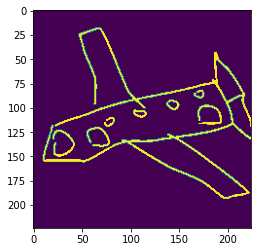

In [32]:
#plot something from nopca
sample = raw_nopca[93, :]
print(np.shape(sample))
sample = sample.reshape((224,  224))
print(np.shape(sample))
plt.imshow(sample)

type:  <class 'numpy.ndarray'>
shape:  (12288, 100)
(10, 10)


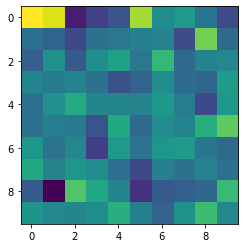

In [33]:
#plot an example from pca 
path = os.path.join(path_to_directory, files[0])
raw_pca = np.load(path)
print("type: ", type(raw_pca))
print("shape: ", np.shape(raw_pca))
sample = raw_pca[0, :]
sample = sample.reshape((10,  10))
print(np.shape(sample))
plt.imshow(sample)

type:  <class 'numpy.ndarray'>
shape:  (12288, 4096)
(64, 64)


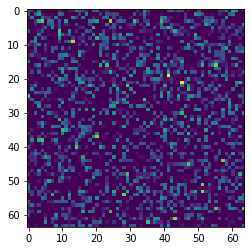

In [34]:
#plot an example from the fc6_nopca 
path = os.path.join(path_to_directory, files[4])
fc6_nopca = np.load(path)
print("type: ", type(fc6_nopca))
print("shape: ", np.shape(fc6_nopca))
sample = fc6_nopca[0, :]
sample = sample.reshape((64,  64))
print(np.shape(sample))
plt.imshow(sample)

type:  <class 'numpy.ndarray'>
shape:  (12288, 100)
(10, 10)


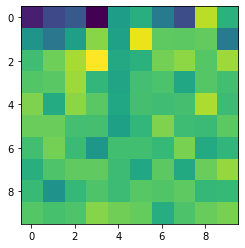

In [35]:
#plot an example from the fc6_nopca 
path = os.path.join(path_to_directory, files[3])
fc6_pca = np.load(path)
print("type: ", type(fc6_pca))
print("shape: ", np.shape(fc6_pca))
sample = fc6_pca[0, :]
sample = sample.reshape((10,  10))
print(np.shape(sample))
plt.imshow(sample)

In [36]:
metaData = pd.read_csv(os.path.join(path_to_directory, files[2]))
metaData

,category,raw_sketch_ind,fc6_sketch_ind,raw_sketch_pca_ind,fc6_sketch_pca_ind
0,airplane,15,11295,15,11295
1,airplane,34,5889,34,5889
2,airplane,93,916,93,916
3,airplane,111,455,111,455
4,airplane,150,12195,150,12195
...,...,...,...,...,...
12283,window,12131,7219,12131,7219
12284,window,12188,10992,12188,10992
12285,window,12223,1674,12223,1674
12286,window,12232,8194,12232,8194


In [37]:
from sklearn.preprocessing import LabelEncoder
metaData['category_factored'] = LabelEncoder().fit_transform(metaData.category)
metaData

,category,raw_sketch_ind,fc6_sketch_ind,raw_sketch_pca_ind,fc6_sketch_pca_ind,category_factored
0,airplane,15,11295,15,11295,0
1,airplane,34,5889,34,5889,0
2,airplane,93,916,93,916,0
3,airplane,111,455,111,455,0
4,airplane,150,12195,150,12195,0
...,...,...,...,...,...,...
12283,window,12131,7219,12131,7219,32
12284,window,12188,10992,12188,10992,32
12285,window,12223,1674,12223,1674,32
12286,window,12232,8194,12232,8194,32


In [38]:
feature_set = [raw_nopca, fc6_nopca, raw_pca, fc6_pca]
labels_set  = [metaData.sort_values(col).category_factored.values 
               for col in metaData.drop(columns=['category', 'category_factored']).columns]

In [39]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.cluster import fowlkes_mallows_score

model = MiniBatchKMeans().fit(feature_set[3])
print(fowlkes_mallows_score(labels_set[3], model.labels_))

0.06746951461717285


In [40]:
from collections import defaultdict 

d = defaultdict(lambda: 0)
for i in [4, 8, 12, 16]: # num clusters
  for j in [25, 50, 100, 150]: #batch size
    model = MiniBatchKMeans(n_clusters=i, batch_size=j).fit(feature_set[3])
    d[i, j] =  fowlkes_mallows_score(labels_set[3], model.labels_)
    print(f'{j}, {i}: ', fowlkes_mallows_score(labels_set[3], model.labels_))

25, 4:  0.0984747353572256
50, 4:  0.09028796252569847
100, 4:  0.09116698196618508
150, 4:  0.09859161615252017
25, 8:  0.06589967623630692
50, 8:  0.07251002845554731
100, 8:  0.06281931428132764
150, 8:  0.06453870643912338
25, 12:  0.055981702446896854
50, 12:  0.054784586697179366
100, 12:  0.05429519604365672
150, 12:  0.05455951773147577
25, 16:  0.049489461556307714
50, 16:  0.04904249608317489
100, 16:  0.04710964902579796
150, 16:  0.04938904090691092


In [41]:
 # format of output is (num_clusters, batch size): fowlkes_mallows score
 # entries are sorted from largest to smallest
sortedlist = sorted(d.items(), key=lambda x:x[1])
sorteddict = dict(sortedlist)
sorteddict

{(4, 25): 0.0984747353572256,
 (4, 50): 0.09028796252569847,
 (4, 100): 0.09116698196618508,
 (4, 150): 0.09859161615252017,
 (8, 25): 0.06589967623630692,
 (8, 50): 0.07251002845554731,
 (8, 100): 0.06281931428132764,
 (8, 150): 0.06453870643912338,
 (12, 25): 0.055981702446896854,
 (12, 50): 0.054784586697179366,
 (12, 100): 0.05429519604365672,
 (12, 150): 0.05455951773147577,
 (16, 25): 0.049489461556307714,
 (16, 50): 0.04904249608317489,
 (16, 100): 0.04710964902579796,
 (16, 150): 0.04938904090691092}

# Ignore below... old code

In [43]:
#iterate and create a labeled dataset 
labels = np.zeros(np.shape(raw_nopca)[0], dtype='<U20')
print("Zero-filled labels", np.shape(labels))
# convert data to dataframe 
for ind in metaData.index: 
  index = metaData['raw_sketch_ind'][ind]
  label = metaData['category'][ind]
  labels[index] = label
labels 

Zero-filled labels (12288,)


array(['windmill', 'axe', 'snake', ..., 'snake', 'butterfly', 'hotdog'],
      dtype='<U20')

In [44]:
# lets build our training and test set 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(raw_nopca, labels)
print("X-Train Shape:", np.shape(X_train))
print("X-Test Shape:", np.shape(X_test))
print("y-Train Shape:", np.shape(y_train))
print("y-Test Shape:", np.shape(y_test))

X-Train Shape: (9216, 50176)
X-Test Shape: (3072, 50176)
y-Train Shape: (9216,)
y-Test Shape: (3072,)


cup
(50176,)


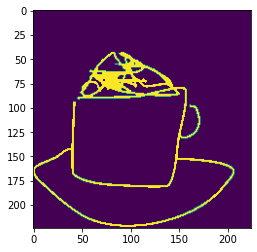

In [45]:
sample = X_train[0, :]
print(y_train[0])
print(np.shape(sample))
sample = sample.reshape((224, 224))
plt.imshow(sample)